# SAS Viya, CAS & Python Integration Workshop

### Notebook Summary

1. [Set Up](#1)
2. [Exploring CAS Action Sets and the CASResults Object](#2)
3. [Working with a SASDataFrame](#3)
4. [Exploring the CAS File Structure](#4)
5. [Loading Data Into CAS](#5)
6. [Exploring Table Details](#6)
7. [Data Exploration](#7)
8. [Filtering Data](#8)
9. [Data Preparation](#9)
10. [SQL](#10)
11. [Analyzing Data](#11)
12. [Promote the Table to use in SAS Visual Analytics](#12)

# SAS Viya

### What is SAS Viya

SAS Viya extends the SAS Platform, operates in the cloud (as well as in hybrid and on-prem solutions) and is open source-friendly. For better performance while manipulating data and running analytical procedures, SAS Viya can run your code in Cloud Analytic Services (CAS). CAS operates on in-memory data, removing the read/write transfer overhead. Further, it enables everyone in an organization to collaborate and work with data by providing a variety of [products and solutions](https://www.sas.com/en_us/software/viya.html) running in CAS.

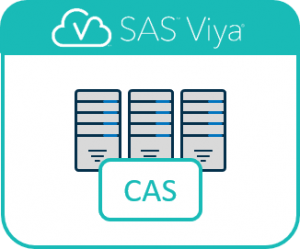

### Cloud Analytic Services (CAS)
SAS Viya processes data and performs analytics using *SAS Cloud Analytic Services*, or *CAS* for short. CAS provides a powerful distributed computing environment designed to store large data sets in memory for fast and efficient processing. It uses scalable, high-performance, multi-threaded algorithms to rapidly perform analytical processing on in-memory data of any size.

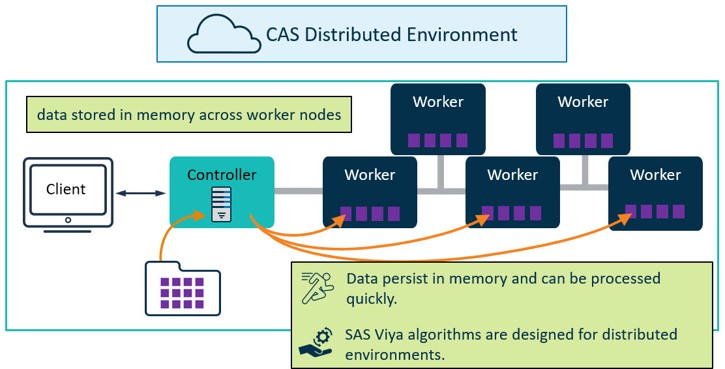

#### For more information about Cloud Analytic Services, visit the documentation: [SAS® Cloud Analytic Services 3.5: Fundamentals](https://go.documentation.sas.com/?docsetId=casfun&docsetTarget=titlepage.htm&docsetVersion=3.5&locale=en)

### SAS Viya is Open
SAS Viya is open. Business analysts and data scientists can explore, prepare and manage data to provide insights, create visualizations or analytical models using the SAS programming language or a variety of open source languages like Python, R, Lua, or Java. Because of this, programmers can easily process data in CAS, using a language of their choice.

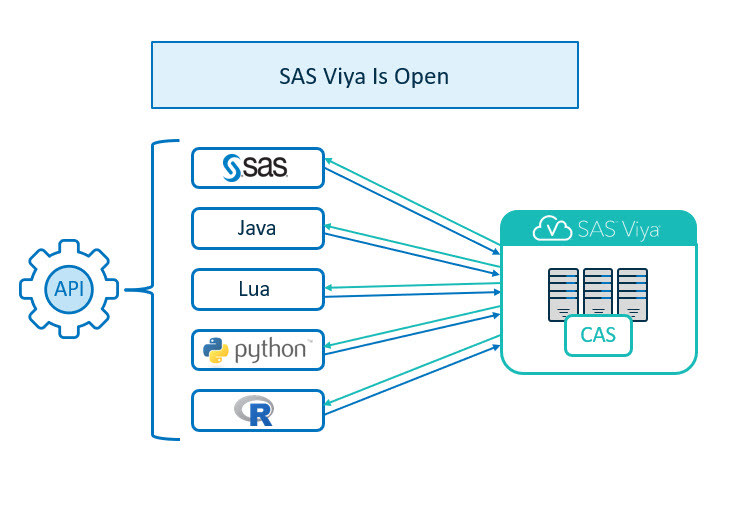

## <a id='1'>1. Set Up

### a. Import Packages

Visit the documentation for the SWAT [(SAS Scripting Wrapper for Analytics Transfer)](https://sassoftware.github.io/python-swat/index.html) package.

In [120]:
## Data Management
import swat
import pandas as pd


## Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


## Global Options
swat.options.cas.trace_actions = False      # Enabling tracing of actions (Default is False. Will change to true later)
swat.options.cas.trace_ui_actions = False   # Display the actions behind “UI” methods (Default is False. Will change to true later)
pd.set_option('display.max_columns', 500)   # Modify DataFrame max columns shown
pd.set_option('display.max_colwidth', 1000) # Modify DataFrame max column width

### b. Make a Connection to CAS</a>

##### To connect to the CAS server you will need:
1. the host name, 
2. the portnumber, 
3. your user name, and your password.

Visit the documentation [Getting Started with SAS® Viya® 3.5 for Python](https://go.documentation.sas.com/api/docsets/caspg3/3.5/content/caspg3.pdf) for more information about connecting to CAS.

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

In [121]:
conn = swat.CAS("server", 8777, "student", "Metadata0", protocol="http")

In [122]:
conn

CAS('server', 8777, 'student', protocol='http', name='py-session-4', session='89a2e396-6556-1640-914f-62f2443a7a33')

### c. Obtain Data for the Demo

In [123]:
conn.fileinfo()

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,drwxr-xr-x,student,sasusers,VBBF,4096,,2020-03-17T03:16:15-04:00,1.900049e+09
1,-rwxr-xr-x,student,sasusers,cars.sashdat,93280,NONE,2020-09-09T08:09:26-04:00,1.915273e+09


In [124]:
## Download the data from github and load to the CAS server
conn.read_csv(r"https://raw.githubusercontent.com/sassoftware/sas-viya-programming/master/data/cars.csv", 
              casout={"name":"cars", "caslib":"casuser", "replace":True})

## Save the in-memory table as a physical file
conn.save(table="cars", name="cars.sashdat",
          caslib="casuser",
          replace=True)

## Drop the in-memory table
conn.droptable(name='cars', caslib="casuser")

NOTE: Cloud Analytic Services made the uploaded file available as table CARS in caslib CASUSER(student).
NOTE: The table CARS has been created in caslib CASUSER(student) from binary data uploaded to Cloud Analytic Services.
NOTE: Cloud Analytic Services saved the file cars.sashdat in caslib CASUSER(student).
NOTE: Cloud Analytic Services dropped table cars from caslib CASUSER(student).


+ Elapsed: 0.000421s, user: 0.00028s, sys: 0.000117s, mem: 0.291mb

## <a id='2'>2. Exploring CAS Action Sets and the CASResults Object</a>
- Think of **action sets** as a *package*, and all the **actions** inside an action set as a *method*.
- CAS actions interact with the CAS server and return a **CASResults** object. 
- A **CASResults** object is simply an ordered **Python dictionary** with a few extra methods and attributes added.
- You can also use the SWAT package API to interact with the CAS server. The SWAT package contains *many* of the methods defined by **Pandas DataFrames**. Using methods from the SWAT API will typically return a CASTable, CASColumn, pandas.DataFrame, or pandas.Series object.

**Documentation**:
- To view all CAS action sets and actions visit the documentation: [SAS® Viya® 3.5 Actions and Action Sets by Name and Product](https://go.documentation.sas.com/?docsetId=allprodsactions&docsetTarget=titlepage.htm&docsetVersion=3.5&locale=en)

- To view the SWAT API Reference visit: [API Reference](https://sassoftware.github.io/python-swat/api.html)

### a. View All the CAS Action Sets that are Loaded in CAS.
- From the **Builtins** action set, use the **actionSetInfo** action, to view all *loaded* action sets.
- CAS action sets and actions are case insensitive.
- CAS actions return a CASResults object.

In [125]:
conn.builtins.actionSetInfo()

,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,3.05.000,tkcas,false
1,accessControl,Access Controls,1,casmeta,3.05.000,tkcas,false
2,builtins,Builtins,1,tkcasablt,3.05.000,tkcas,false
3,configuration,Server Properties,1,tkcascfg,3.05.000,tkcas,false
4,dataPreprocess,Data Preprocess,1,tktrans,3.05.000,crsstat,false
5,dataStep,DATA Step,1,datastep,3.05.000,tkcas,false
6,percentile,Percentile,1,tkcasptl,3.05.000,crsstat,false
7,search,Search,1,casidx,3.05.000,crssearch,false
8,session,Session Methods,1,tkcsessn,3.05.000,tkcas,false
9,sessionProp,Session Properties,1,tkcstate,3.05.000,tkcas,false


View the available CAS actions in the **builtins** action set using the **help** function.

In [126]:
conn.help(actionSet="builtins")

NOTE: Information for action set 'builtins':
NOTE:    builtins
NOTE:       addNode - Adds a machine to the server
NOTE:       removeNode - Remove one or more machines from the server
NOTE:       help - Shows the parameters for an action or lists all available actions
NOTE:       listNodes - Shows the host names used by the server
NOTE:       loadActionSet - Loads an action set for use in this session
NOTE:       installActionSet - Loads an action set in new sessions automatically
NOTE:       log - Shows and modifies logging levels
NOTE:       queryActionSet - Shows whether an action set is loaded
NOTE:       queryName - Checks whether a name is an action or action set name
NOTE:       reflect - Shows detailed parameter information for an action or all actions in an action set
NOTE:       serverStatus - Shows the status of the server
NOTE:       about - Shows the status of the server
NOTE:       shutdown - Shuts down the server
NOTE:       userInfo - Shows the user information for your 

,name,description
0,addNode,Adds a machine to the server
1,removeNode,Remove one or more machines from the server
2,help,Shows the parameters for an action or lists all available actions
3,listNodes,Shows the host names used by the server
4,loadActionSet,Loads an action set for use in this session
5,installActionSet,Loads an action set in new sessions automatically
6,log,Shows and modifies logging levels
7,queryActionSet,Shows whether an action set is loaded
8,queryName,Checks whether a name is an action or action set name
9,reflect,Shows detailed parameter information for an action or all actions in an action set


You do not need to specify the CAS action set prior to the CAS action. Moving forward, all actions will not include the CAS action set.

In [127]:
conn.actionSetInfo()

,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,3.05.000,tkcas,false
1,accessControl,Access Controls,1,casmeta,3.05.000,tkcas,false
2,builtins,Builtins,1,tkcasablt,3.05.000,tkcas,false
3,configuration,Server Properties,1,tkcascfg,3.05.000,tkcas,false
4,dataPreprocess,Data Preprocess,1,tktrans,3.05.000,crsstat,false
5,dataStep,DATA Step,1,datastep,3.05.000,tkcas,false
6,percentile,Percentile,1,tkcasptl,3.05.000,crsstat,false
7,search,Search,1,casidx,3.05.000,crssearch,false
8,session,Session Methods,1,tkcsessn,3.05.000,tkcas,false
9,sessionProp,Session Properties,1,tkcstate,3.05.000,tkcas,false


All CAS actions return a **CASResults** object.

In [128]:
type(conn.actionSetInfo())

swat.cas.results.CASResults

### b. CASResults Object
- A **CASResults** object is an ordered Python dictionary with *keys* and *values*.
- A **CASResults** object is local data returned by the CAS server.
- While all **CAS actions** return a **CASResults** object, there are no rules about how many keys are contained in the object, or what values are returned.

View the *keys* in the **CASResults** object. This specific **CASResults** object contains a *single key*, and a *single value*.

In [129]:
conn.actionSetInfo().keys()

odict_keys(['setinfo'])

Call the **setinfo** key to return the *value*.

In [130]:
conn.actionSetInfo()['setinfo']

,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,3.05.000,tkcas,false
1,accessControl,Access Controls,1,casmeta,3.05.000,tkcas,false
2,builtins,Builtins,1,tkcasablt,3.05.000,tkcas,false
3,configuration,Server Properties,1,tkcascfg,3.05.000,tkcas,false
4,dataPreprocess,Data Preprocess,1,tktrans,3.05.000,crsstat,false
5,dataStep,DATA Step,1,datastep,3.05.000,tkcas,false
6,percentile,Percentile,1,tkcasptl,3.05.000,crsstat,false
7,search,Search,1,casidx,3.05.000,crssearch,false
8,session,Session Methods,1,tkcsessn,3.05.000,tkcas,false
9,sessionProp,Session Properties,1,tkcstate,3.05.000,tkcas,false


The **setinfo** key holds a **SASDataFrame** object. 

In [131]:
type(conn.actionSetInfo()['setinfo'])

swat.dataframe.SASDataFrame

## <a id='3'>3. Working with a SASDataFrame
- A **SASDataFrame** object contains local data.
- A **SASDataFrame** object is a subclass of a **Pandas DataFrame**. You can work with them as you normally do a **Pandas DataFrame**.

**NOTE: When bringing data from CAS locally, remember that CAS can hold larger data than your local computer can handle.**



### a. Create a **SASDataFrame** Object Named *df*.

In [132]:
df = conn.actionSetInfo()['setinfo']
type(df)

swat.dataframe.SASDataFrame

A SASDataFrame is **local** data. Work with it as you would a Pandas DataFrame.

### b. Use Pandas Methods on a SASDataFrame.

View the first *5* rows of the **SASDataFrame** using the pandas **head** method.

In [133]:
df.head()

,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,3.05.000,tkcas,false
1,accessControl,Access Controls,1,casmeta,3.05.000,tkcas,false
2,builtins,Builtins,1,tkcasablt,3.05.000,tkcas,false
3,configuration,Server Properties,1,tkcascfg,3.05.000,tkcas,false
4,dataPreprocess,Data Preprocess,1,tktrans,3.05.000,crsstat,false


Find all rows where the value in the **actionset** column equals *simple* using the pandas **loc** method.

In [134]:
df.loc[df['actionset']=='simple',['actionset','label']]

,actionset,label
10,simple,Simple Analytics


View counts of unique values using the pandas **value_counts** method and plot a bar chart.

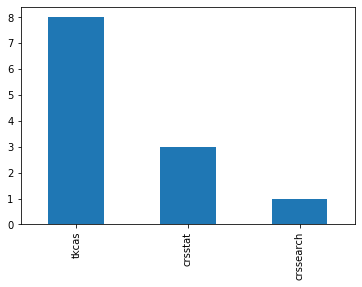

In [135]:
df['product_name'].value_counts().plot(kind="bar")

## <a id='4'> 4. Exploring the CAS File Structure</a>

### **Caslib Overview**:
1. A **caslib** has two parts:
    1. **Data Source** - Connection information about the **data source** gives access to a resource that contains data. These can be  files that are located in a file system, a database, streaming data from an ESP (Event Stream Processing) server, or other data sources that SAS can access.
    2. **In-Memory Space** - The **in-memory** portion of a caslib that contains data that is uploaded into memory and ready for processing.
    
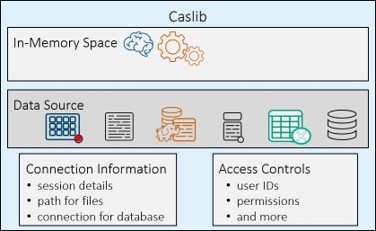
    

2. Think of your active **caslib** as the *current working directory* of your CAS session, and it's only possible to have one active caslib. 

3. When you want to work with data from your **data source**, you must load the data into the **in-memory portion** for processing. This loaded table is known as a **CAS Table**.

### **Types of Caslibs**:
1. **Personal Caslib** - By default, all users are given access to their own caslib, named CASUSER, within a CAS session.  This is a personal caslib and is only accessible to the user who owns the CAS session.
2. **Pre-defined Caslib** - These are defined by an administrator and are available to all CAS sessions (dependent on access controls). Think of these as different folders for different units of a business. You can have an HR caslib with HR data, Marketing caslib with Marketing data, etc.
3. **Manually added Caslib** - These can be added at any point to perform ad-hoc analysis within CAS.

### **Caslib Scope**
1. **Session Caslib** - When a caslib is defined without including the GLOBAL option, the caslib is a session-scoped caslib. When a table is loaded to the CAS server with session-scoped caslib, the table is available to that specific CAS user session only. Think of session scope as *local* to that specific session only.
2. **Global Caslib** -These are available to anyone who has access to the CAS Server (dependent on access controls). The name of these caslibs must be unique across all CAS sessions on the server.


**For additional information about caslibs**: 
- [Watch SAS® Viya™ CAS Libraries (Caslibs) Simplified](https://video.sas.com/detail/video/5343952274001/sas%C2%AE-viya%E2%84%A2-cas-libraries-caslibs-simplified)
- [SAS® Cloud Analytic Services 3.5: Fundamentals - Caslibs](https://go.documentation.sas.com/?docsetId=casfun&docsetTarget=n1i11h5hggxv65n1m5i4nw9s5cli.htm&docsetVersion=3.5&locale=en)

### a. View all Available Caslibs
- Depending on your CAS server setup, you might already have one or more caslibs configured and ready to use.
- If you do not have **ReadInfo** permissions on a caslib, then you will *not see* the caslib.

View all available caslibs using the **casLibInfo** action.

In [136]:
conn.caslibInfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(student),PATH,Personal File System Caslib,/home/student/casuser/,,1.0,0.0,1.0,1.0,0.0,1.0
1,Formats,PATH,Stores user defined formats.,/opt/sas/viya/config/data/cas/default/formats/,,0.0,0.0,0.0,0.0,0.0,0.0
2,ModelPerformanceData,PATH,Library for Model Management performance objects.,/opt/sas/viya/config/data/cas/default/modelMonitorLibrary/,,0.0,0.0,0.0,0.0,0.0,0.0
3,Models,PATH,Stores models created by Visual Analytics for use in other analytics or SAS Studio.,/opt/sas/viya/config/data/cas/default/models/,,0.0,0.0,0.0,0.0,0.0,0.0
4,Public,PATH,"Shared and writeable caslib, accessible to all users.",/opt/sas/viya/config/data/cas/default/public/,,0.0,0.0,0.0,0.0,0.0,0.0
5,Samples,PATH,"Stores sample data, supplied by SAS.",/opt/sas/viya/config/data/cas/default/samples/,,0.0,0.0,0.0,0.0,0.0,0.0
6,SystemData,PATH,"Stores application generated data, used for general reporting.",/opt/sas/viya/config/data/cas/default/sysData/,,0.0,0.0,0.0,0.0,0.0,0.0


### b. View Available Files in the *casuser* Caslib

In [137]:
conn.fileInfo(caslib="casuser")

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,drwxr-xr-x,student,sasusers,VBBF,4096,,2020-03-17T03:16:15-04:00,1.900049e+09
1,-rwxr-xr-x,student,sasusers,cars.sashdat,93280,NONE,2020-09-09T08:09:34-04:00,1.915273e+09


### c. View All Available In-Memory Tables in the *casuser* Caslib

NOTE: Tables need to be **in-memory** to be processed by CAS. 

In [138]:
conn.tableInfo(caslib="casuser")

NOTE: No tables are available in caslib CASUSER(student) of Cloud Analytic Services.


+ Elapsed: 0.000495s, user: 0.000447s, mem: 0.303mb

## <a id='5'>5. Loading Data Into CAS
There are various ways of loading data into CAS: 
1. server-side data
2. client-side parsed 
3. client-side files uploaded and parsed on the server

They follow these naming conventions:

- **load***: Loads server-side data 
- **read_***: Uses client-side parsers and then uploads the result into CAS
- **upload***: Uploads client-side files as is, which are parsed on the server

For more information about loading client side files to CAS: [Two Simple Ways to Import Local Files with Python in CAS (Viya 3.5)](www.google.com)

### a. Loading Server-Side Data into Memory.

View the available files in the casuser caslib.

In [139]:
conn.fileInfo(caslib="casuser")

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,drwxr-xr-x,student,sasusers,VBBF,4096,,2020-03-17T03:16:15-04:00,1.900049e+09
1,-rwxr-xr-x,student,sasusers,cars.sashdat,93280,NONE,2020-09-09T08:09:34-04:00,1.915273e+09


There are two methods that can be used to load server-side data into CAS:
- **loadtable** - Loads a table into CAS and returns a CASResults object.
- **load_path** - Convenience method. Similar to loadtable, load_path loads a table into CAS and returns a reference to that CAS table in one step.


**loadtable**

In [140]:
# 1. Load the table into CAS. Will return a CASResults object.
conn.loadtable(path="cars.sashdat", caslib="casuser", 
               casout={"caslib":"casuser","name":"cars", "replace":True})

NOTE: Cloud Analytic Services made the file cars.sashdat available as table CARS in caslib CASUSER(student).


[caslib]

 'CASUSER(student)'

[tableName]

 'CARS'

[casTable]

 CASTable('CARS', caslib='CASUSER(student)')

+ Elapsed: 0.00085s, sys: 0.000787s, mem: 0.724mb

In [141]:
conn.tableInfo(caslib="casuser")

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS,428,15,0,utf-8,2020-09-09T08:09:35-04:00,2020-09-09T08:09:35-04:00,2020-09-09T08:09:35-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,cars.sashdat,CASUSER(student),0,student,,2020-09-09T08:09:34-04:00,1.915273e+09


In [142]:
# 2. Create a reference to the in-memory table
castbl = conn.CASTable("cars",caslib="casuser")

**load_path**

In [143]:
# Load the table into CAS and create a reference to that table in one step.
##castbl = conn.load_path(path="cars.sashdat", caslib="casuser",
##                        casout={"caslib":"casuser","name":"cars", "replace":True})

## b. Local vs CAS Data

A CASTable object is a reference to data **in the CAS server**. Actions or methods run on a CASTable object are processed in CAS.

In [144]:
type(castbl)

swat.cas.table.CASTable

In [145]:
print(castbl)

CASTable('cars', caslib='casuser')


View the first 5 rows of the in-memory table using the **head** method. The head method is not a CAS action, so it will not return a CASResults object. The head method is using the API to CAS. The API to CAS contains many of the pandas methods you are familiar with. These methods **process the data in CAS** and can return a variety of **different objects locally**.

[SWAT API Reference](https://sassoftware.github.io/python-swat/api.html)

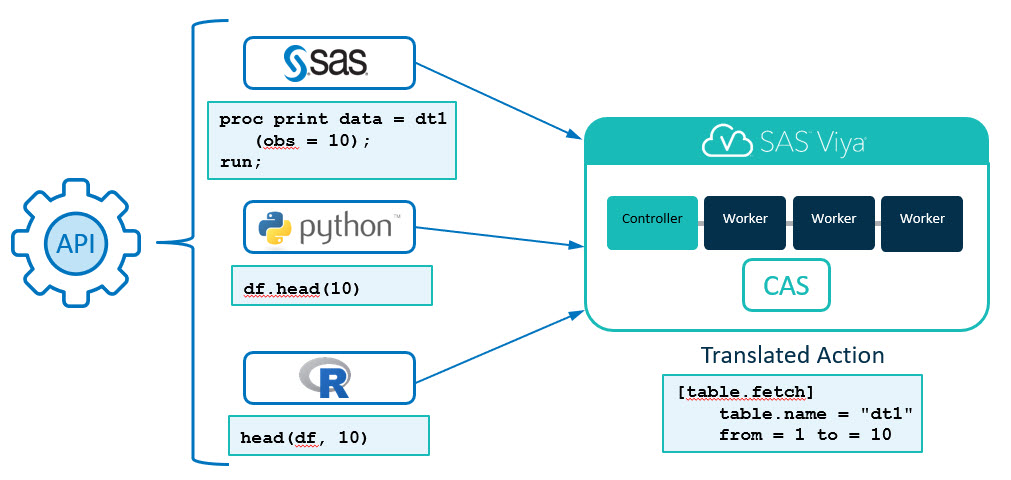

In [146]:
castbl.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


The results of using the head method returns a SASDataFrame. SASDataFrames are located on locally.

In [147]:
type(castbl.head())

swat.dataframe.SASDataFrame

You can use the **fetch** CAS action to return similar results. The processing of the fetch CAS action occurs in CAS and returns a CASResults object to your local machine. When using a CAS action a CASResults object is always returned.

In [148]:
castbl.fetch(to=5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


CASResults objects are local.

In [149]:
type(castbl.fetch(to=5))

swat.cas.results.CASResults

SASDataFrame objects can be contained in the CASResults object.

In [150]:
type(castbl.fetch(to=5)['Fetch'])

swat.dataframe.SASDataFrame

Turn on tracing.

In [151]:
swat.options.cas.trace_actions = True
swat.options.cas.trace_ui_actions = True

## <a id='6'>6. Exploring Table Details

### a. View the Number of Rows and Columns in the In-Memory Table.

Use **shape** to return a tuple of the CAS data. 

In [152]:
castbl.shape

[builtins.queryname]
    _apptag = 'UI'
    _messagelevel = 'error'
    name = 'simple.numrows'

[builtins.reflect]
    _apptag = 'UI'
    _messagelevel = 'error'
    actionset = 'simple'
    showhidden = True

[simple.numrows]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[table.tableinfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    caslib = 'casuser'
    name = 'cars'



(428, 15)

Use the **numRows** CAS action to shows the number of rows in a CAS table.

In [153]:
castbl.numRows()

[simple.numrows]
    table.caslib = 'casuser'
    table.name = 'cars'



[numrows]

 428

+ Elapsed: 0.000417s, user: 0.000393s, mem: 0.417mb

Use the **tableInfo** CAS action to show information about a CAS table.

In [154]:
castbl.tableInfo()

[table.tableinfo]
    caslib = 'casuser'
    name = 'cars'



,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS,428,15,0,utf-8,2020-09-09T08:09:35-04:00,2020-09-09T08:09:35-04:00,2020-09-09T08:09:40-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,cars.sashdat,CASUSER(student),0,student,,2020-09-09T08:09:34-04:00,1.915273e+09


Create a function to return the in-memory table name, number of rows and columns.

In [155]:
def details(tbl):
    sasdf = tbl.tableInfo()["TableInfo"].set_index("Name").loc[:,["Rows","Columns"]]
    return sasdf

In [156]:
details(castbl)

[table.tableinfo]
    caslib = 'casuser'
    name = 'cars'



,Rows,Columns
Name,,
CARS,428,15


### b. View the Column Information

In [157]:
castbl.columnInfo()

[table.columninfo]
    table.caslib = 'casuser'
    table.name = 'cars'



,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Make,,1,varchar,13,13,,0,0
1,Model,,2,varchar,39,39,,0,0
2,Type,,3,varchar,6,6,,0,0
3,Origin,,4,varchar,6,6,,0,0
4,DriveTrain,,5,varchar,5,5,,0,0
5,MSRP,,6,double,8,12,,0,0
6,Invoice,,7,double,8,12,,0,0
7,EngineSize,,8,double,8,12,,0,0
8,Cylinders,,9,double,8,12,,0,0
9,Horsepower,,10,double,8,12,,0,0


In [158]:
castbl.dtypes

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'



Make           varchar
Model          varchar
Type           varchar
Origin         varchar
DriveTrain     varchar
MSRP            double
Invoice         double
EngineSize      double
Cylinders       double
Horsepower      double
MPG_City        double
MPG_Highway     double
Weight          double
Wheelbase       double
Length          double
dtype: object

## <a id='7'>7. Data Exploration

### a. Summary Statistics

Using the **summary** CAS action to generate descriptive statistics of numeric variables.

In [159]:
castbl.summary()

[simple.summary]
    table.caslib = 'casuser'
    table.name = 'cars'



,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,MSRP,10280.0,192465.0,428.0,0.0,32774.855140,14027638.0,19431.716674,939.267478,3.775916e+08,6.209854e+11,1.612316e+11,59.288490,34.894059,4.160412e-127,2.798099,13.879206
1,Invoice,9875.0,173560.0,428.0,0.0,30014.700935,12846292.0,17642.117750,852.763949,3.112443e+08,5.184789e+11,1.329013e+11,58.778256,35.196963,2.684398e-128,2.834740,13.946164
2,EngineSize,1.3,8.3,428.0,0.0,3.196729,1368.2,1.108595,0.053586,1.228982e+00,4.898540e+03,5.247754e+02,34.679034,59.656105,3.133745e-209,0.708152,0.541944
3,Cylinders,3.0,12.0,426.0,2.0,5.807512,2474.0,1.558443,0.075507,2.428743e+00,1.540000e+04,1.032216e+03,26.834946,76.913766,1.515569e-251,0.592785,0.440378
4,Horsepower,73.0,500.0,428.0,0.0,215.885514,92399.0,71.836032,3.472326,5.160415e+03,2.215110e+07,2.203497e+06,33.275059,62.173176,4.185344e-216,0.930331,1.552159
5,MPG_City,10.0,60.0,428.0,0.0,20.060748,8586.0,5.238218,0.253199,2.743892e+01,1.839580e+05,1.171642e+04,26.111777,79.229235,1.866284e-257,2.782072,15.791147
6,MPG_Highway,12.0,66.0,428.0,0.0,26.843458,11489.0,5.741201,0.277511,3.296139e+01,3.224790e+05,1.407451e+04,21.387709,96.729204,1.665621e-292,1.252395,6.045611
7,Weight,1850.0,7190.0,428.0,0.0,3577.953271,1531364.0,758.983215,36.686838,5.760555e+05,5.725125e+09,2.459757e+08,21.212776,97.526890,5.812547e-294,0.891824,1.688789
8,Wheelbase,89.0,144.0,428.0,0.0,108.154206,46290.0,8.311813,0.401767,6.908624e+01,5.035958e+06,2.949982e+04,7.685150,269.196577,0.000000e+00,0.962287,2.133649
9,Length,143.0,238.0,428.0,0.0,186.362150,79763.0,14.357991,0.694020,2.061519e+02,1.495283e+07,8.802687e+04,7.704349,268.525733,0.000000e+00,0.181977,0.614725


Using the **describe** method.

In [160]:
castbl.describe()

[simple.numrows]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[simple.topk]
    _apptag = 'UI'
    _messagelevel = 'error'
    bottomk = 0
    includemissing = False
    maxtie = 0
    order = 'freq'
    raw = True
    table.caslib = 'casuser'
    table.name = 'cars'
    topk = 1

[simple.topk]
    _apptag = 'UI'
    _messagelevel = 'error'
    bottomk = 1
    includemissing = False
    order = 'value'
    raw = True
    table.caslib = 'casuser'
    table.name = 'cars'
    topk = 1

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[builtins.queryactionset]
    _apptag = 'UI'
    _messagelevel = 'error'
    actionset = 'percen

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20329.500000,18851.000000,2.350000,4.000000,165.000000,17.000000,24.000000,3103.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39215.000000,35732.500000,3.900000,6.000000,255.000000,21.500000,29.000000,3978.500000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


Turn off tracing.

In [161]:
swat.options.cas.trace_actions = False
swat.options.cas.trace_ui_actions = False 

### b. Distinct Values

Use the **distinct** CAS action to calculate the number of distinct values in the cars table.

In [162]:
castbl.distinct()

,Column,NDistinct,NMiss,Trunc
0,Make,38.0,0.0,0.0
1,Model,425.0,0.0,0.0
2,Type,6.0,0.0,0.0
3,Origin,3.0,0.0,0.0
4,DriveTrain,3.0,0.0,0.0
5,MSRP,410.0,0.0,0.0
6,Invoice,425.0,0.0,0.0
7,EngineSize,43.0,0.0,0.0
8,Cylinders,8.0,2.0,0.0
9,Horsepower,110.0,0.0,0.0


Plot the number of missing values for each column.

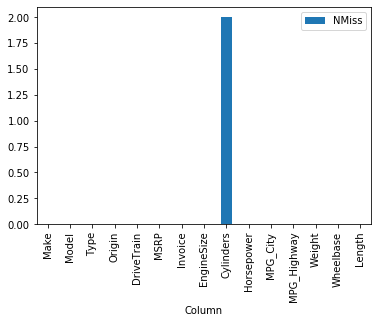

In [163]:
castbl.distinct()['Distinct'] \
      .set_index("Column") \
      .loc[:,['NMiss']] \
      .plot(kind='bar')

Use the **distinct** CAS action to calculate the number of distinct values in the Origin, Type and Make columns using the distinct CAS action.

In [164]:
castbl.distinct(inputs=["Origin","Type","Make"])

,Column,NDistinct,NMiss,Trunc
0,Origin,3.0,0.0,0.0
1,Type,6.0,0.0,0.0
2,Make,38.0,0.0,0.0


Create a new CAS table named **castblDistinct** with the number of distinct values for the specified inputs.

In [165]:
castbl.distinct(inputs=["Origin","Type","Make"],
                casout={"caslib":"casuser",          ## Create a new CAS table in casuser
                        "name":"castblDistinct",     ## Name the table castblDistinct
                        "replace":True})             ## Replace if exists

,casLib,Name,Rows,Columns,casTable
0,CASUSER(student),castblDistinct,3,4,"CASTable('castblDistinct', caslib='CASUSER(student)')"


View the available in-memory tables.

In [166]:
conn.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS,428,15,0,utf-8,2020-09-09T08:09:35-04:00,2020-09-09T08:09:35-04:00,2020-09-09T08:09:43-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,cars.sashdat,CASUSER(student),0,student,,2020-09-09T08:09:34-04:00,1.915273e+09
1,CASTBLDISTINCT,3,4,0,utf-8,2020-09-09T08:09:43-04:00,2020-09-09T08:09:43-04:00,2020-09-09T08:09:43-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,,,0,student,,,NaN


Using Pandas methods.

In [167]:
castbl.Cylinders.nunique()

7

In [168]:
castbl.Cylinders.isnull().sum()

2.0

### c. Frequency

View the frequency of the Origin column using the **freq** CAS action.

In [169]:
castbl.freq(inputs=["Origin"])

,Column,CharVar,FmtVar,Level,Frequency
0,Origin,Asia,Asia,1,158.0
1,Origin,Europe,Europe,2,123.0
2,Origin,USA,USA,3,147.0


Plot the resuls of the **freq** CAS action in a bar chart.

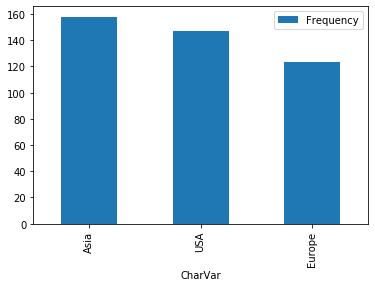

In [170]:
## Perform the processing in CAS and store the summary in the originFreq object.
originFreq = castbl.freq(inputs=["Origin"])['Frequency']

## Graph the summarized local data.
originFreq.loc[:,["CharVar","Frequency"]] \
          .sort_values(by="Frequency", ascending=False) \
          .set_index("CharVar") \
          .plot(kind="bar")

Use the **value_counts** method. The value_counts method will process in CAS and return the summary locally. The plot method will create the graph locally.

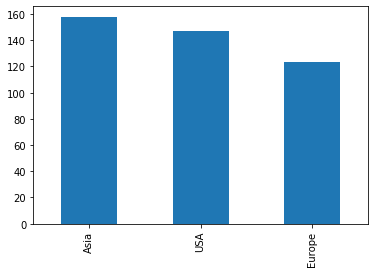

In [171]:
castbl['Origin'].value_counts().plot(kind='bar')

Perform a frequency on mulitple columns. The final CASResults object will contain a SASDataFrame with a frequency of each of the specified columns in one table.

In [172]:
castbl.freq(inputs=["Origin","Make","Type","DriveTrain"])

,Column,CharVar,FmtVar,Level,Frequency
0,Origin,Asia,Asia,1,158.0
1,Origin,Europe,Europe,2,123.0
2,Origin,USA,USA,3,147.0
3,Make,Acura,Acura,1,7.0
4,Make,Audi,Audi,2,19.0
5,Make,BMW,BMW,3,20.0
6,Make,Buick,Buick,4,9.0
7,Make,Cadillac,Cadillac,5,8.0
8,Make,Chevrolet,Chevrolet,6,27.0
9,Make,Chrysler,Chrysler,7,15.0


### D. Create a Frequency Table of all Columns with Less Than 20 Distinct Values.

Use the distinct CAS action to find the number of distinct values for each column and filter for all columns with less than 20 distinct values.

In [173]:
distinctCars = castbl.distinct()['Distinct']
distinctCars.loc[distinctCars["NDistinct"]<=20,:]

,Column,NDistinct,NMiss,Trunc
2,Type,6.0,0.0,0.0
3,Origin,3.0,0.0,0.0
4,DriveTrain,3.0,0.0,0.0
8,Cylinders,8.0,2.0,0.0


Create a variable named **distinctCars** that holds the SASDataFrame from the results above.

In [174]:
distinctCars = distinctCars.loc[distinctCars["NDistinct"]<=20,:]

Create a list of column names that have less than 20 distinct values named **listCars**.

In [175]:
listCars = distinctCars.Column.unique().tolist()
print(listCars)

['Type', 'Origin', 'DriveTrain', 'Cylinders']


Use the list from above to create a frequency table of columns with less than 20 distinct values.

In [176]:
castbl.freq(inputs=listCars)

,Column,NumVar,CharVar,FmtVar,Level,Frequency
0,Type,NaN,Hybrid,Hybrid,1,3.0
1,Type,NaN,Sedan,Sedan,2,262.0
2,Type,NaN,Sports,Sports,3,49.0
3,Type,NaN,SUV,SUV,4,60.0
4,Type,NaN,Truck,Truck,5,24.0
5,Type,NaN,Wagon,Wagon,6,30.0
6,Origin,NaN,Asia,Asia,1,158.0
7,Origin,NaN,Europe,Europe,2,123.0
8,Origin,NaN,USA,USA,3,147.0
9,DriveTrain,NaN,All,All,1,92.0


## <a id='8'>8. Filtering Data

### a. Subset Using Pandas Indexing Expressions.

In [177]:
castbl[castbl["Make"]=="Toyota"].head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,20510.0,18926.0,1.5,4.0,110.0,59.0,51.0,2890.0,106.0,175.0
1,Toyota,Sequoia SR5,SUV,Asia,All,35695.0,31827.0,4.7,8.0,240.0,14.0,17.0,5270.0,118.0,204.0
2,Toyota,4Runner SR5 V6,SUV,Asia,Front,27710.0,24801.0,4.0,6.0,245.0,18.0,21.0,4035.0,110.0,189.0
3,Toyota,Highlander V6,SUV,Asia,All,27930.0,24915.0,3.3,6.0,230.0,18.0,24.0,3935.0,107.0,185.0
4,Toyota,Land Cruiser,SUV,Asia,All,54765.0,47986.0,4.7,8.0,325.0,13.0,17.0,5390.0,112.0,193.0


In [178]:
castbl[(castbl["Make"]=="Toyota") & (castbl["Type"]=="Hybrid")].head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,20510.0,18926.0,1.5,4.0,110.0,59.0,51.0,2890.0,106.0,175.0


### b. Subset Using the Query Method.

In [179]:
castbl.query("Make='Toyota'").head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,20510.0,18926.0,1.5,4.0,110.0,59.0,51.0,2890.0,106.0,175.0
1,Toyota,Sequoia SR5,SUV,Asia,All,35695.0,31827.0,4.7,8.0,240.0,14.0,17.0,5270.0,118.0,204.0
2,Toyota,4Runner SR5 V6,SUV,Asia,Front,27710.0,24801.0,4.0,6.0,245.0,18.0,21.0,4035.0,110.0,189.0
3,Toyota,Highlander V6,SUV,Asia,All,27930.0,24915.0,3.3,6.0,230.0,18.0,24.0,3935.0,107.0,185.0
4,Toyota,Land Cruiser,SUV,Asia,All,54765.0,47986.0,4.7,8.0,325.0,13.0,17.0,5390.0,112.0,193.0


In [180]:
castbl.query("Make='Toyota' and Type='Hybrid'").head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,20510.0,18926.0,1.5,4.0,110.0,59.0,51.0,2890.0,106.0,175.0


## <a id='9'>9. Data Preparation

Create a new column that calculates the average of MPG_City and MPG_Highway. Processing done in CAS.

In [181]:
castbl["avgMPG"] = (castbl["MPG_City"] + castbl["MPG_Highway"])/2

In [182]:
castbl

CASTable('cars', caslib='casuser', computedvars=['avgMPG'], computedvarsprogram='_add_5_ = (MPG_City) + (MPG_Highway); _div_6_ = (_add_5_) / (2); avgMPG = _div_6_; ')[['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'avgMPG']]

In [183]:
castbl.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,avgMPG
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,20.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,27.5
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,25.5
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,24.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,21.0


Remove the Model and MSRP columns.

In [184]:
cols = ['Make', 'Type', 'Origin', 'DriveTrain','Invoice', 
        'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 
        'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'avgMPG']

In [185]:
castbl = castbl[cols]

In [186]:
castbl

CASTable('cars', caslib='casuser', computedvars=['avgMPG'], computedvarsprogram='_add_5_ = (MPG_City) + (MPG_Highway); _div_6_ = (_add_5_) / (2); avgMPG = _div_6_; ')[['Make', 'Type', 'Origin', 'DriveTrain', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'avgMPG']]

In [187]:
castbl.head()

,Make,Type,Origin,DriveTrain,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,avgMPG
0,Acura,SUV,Asia,All,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,20.0
1,Acura,Sedan,Asia,Front,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,27.5
2,Acura,Sedan,Asia,Front,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,25.5
3,Acura,Sedan,Asia,Front,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,24.0
4,Acura,Sedan,Asia,Front,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,21.0


## <a id='10'>10. SQL

### a. Load the fedSQL CAS Action Set

View all **available** (not just loaded) CAS action sets by using the all=True parameter.

In [188]:
conn.actionSetInfo(all=True)['setinfo']

,actionset,label,loaded,extension,version,product_name,user_defined
0,access,,0,tkacon,3.05.000,tkcas,false
1,accessControl,Access Controls,1,casmeta,3.05.000,tkcas,false
2,activeLearn,,0,tkaluc,3.05.000,crsactivelrn,false
3,aggregation,,0,tkcasagg,3.05.000,crsaggregate,false
4,astore,,0,astore,3.05.000,crsastore,false
...,...,...,...,...,...,...,...
115,tsInfo,,0,tsinfo,3.05.000,crstmserinfo,false
116,tSne,,0,tsne,3.05.000,crstsne,false
117,tsReconcile,,0,tkrecfor,3.05.000,crsreconcile,false
118,uniTimeSeries,,0,cts,3.05.000,crsutmseries,false


Search the actionset column for any CAS action set that contains the string *sql*.

In [189]:
actionSets = conn.actionSetInfo(all=True)['setinfo']
actionSets.loc[actionSets['actionset'].str.upper().str.contains("SQL")]

,actionset,label,loaded,extension,version,product_name,user_defined
36,fedSql,,0,casfedsql,3.05.000,crsfedsql,false


Load the **fedSQL** action set using the **loadActionSet** action.

In [190]:
conn.loadActionSet(actionSet="fedSQL")

NOTE: Added action set 'fedSQL'.


[actionset]

 'fedSQL'

+ Elapsed: 0.00172s, user: 0.00169s, mem: 0.261mb

In [191]:
conn.actionSetInfo()

,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,3.05.000,tkcas,false
1,accessControl,Access Controls,1,casmeta,3.05.000,tkcas,false
2,builtins,Builtins,1,tkcasablt,3.05.000,tkcas,false
3,configuration,Server Properties,1,tkcascfg,3.05.000,tkcas,false
4,dataPreprocess,Data Preprocess,1,tktrans,3.05.000,crsstat,false
5,dataStep,DATA Step,1,datastep,3.05.000,tkcas,false
6,fedSql,FedSQL,1,casfedsql,3.05.000,crsfedsql,false
7,percentile,Percentile,1,tkcasptl,3.05.000,crsstat,false
8,search,Search,1,casidx,3.05.000,crssearch,false
9,session,Session Methods,1,tkcsessn,3.05.000,tkcas,false


In [192]:
conn.help(actionSet="fedSQL")

NOTE: Information for action set 'fedSQL':
NOTE:    fedSql
NOTE:       execDirect - Submits a SAS FedSQL language statement for immediate execution


,name,description
0,execDirect,Submits a SAS FedSQL language statement for immediate execution


### b. Run SQL Queries in CAS

Run a query to view the first 10 rows of the cars table.

In [193]:
conn.execdirect("""select *
                   from cars 
                   limit 10""")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100.0,41100.0,3.5,6.0,225.0,18.0,24.0,3893.0,115.0,197.0
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,89765.0,79978.0,3.2,6.0,290.0,17.0,24.0,3153.0,100.0,174.0
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,25940.0,23508.0,1.8,4.0,170.0,22.0,31.0,3252.0,104.0,179.0
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,35940.0,32506.0,1.8,4.0,170.0,23.0,30.0,3638.0,105.0,180.0
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,31840.0,28846.0,3.0,6.0,220.0,20.0,28.0,3462.0,104.0,179.0


Find the average MSRP of each car make.

In [194]:
conn.execdirect("""select Make, round(avg(MSRP)) as avgMSRP
                   from cars 
                   group by Make""")

,Make,AVGMSRP
0,Chrysler,27252.0
1,Mercedes-Benz,60657.0
2,Kia,15876.0
3,Acura,42939.0
4,Pontiac,24156.0
5,Subaru,25502.0
6,Toyota,22524.0
7,Lincoln,42876.0
8,BMW,43285.0
9,Hyundai,17477.0


Create a table named **make_avg** that contains the average MSRP of each car make.

In [195]:
conn.execdirect("""create table make_avg as
                      select Make, round(avg(MSRP)) as test
                      from cars 
                      group by Make""")

NOTE: Table MAKE_AVG was created in caslib CASUSER(student) with 38 rows returned.


+ Elapsed: 0.0505s, user: 0.0878s, sys: 0.0725s, mem: 64mb

In [196]:
conn.tableInfo(caslib="casuser")

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS,428,15,0,utf-8,2020-09-09T08:09:35-04:00,2020-09-09T08:09:35-04:00,2020-09-09T08:09:48-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,cars.sashdat,CASUSER(student),0,student,,2020-09-09T08:09:34-04:00,1.915273e+09
1,CASTBLDISTINCT,3,4,0,utf-8,2020-09-09T08:09:43-04:00,2020-09-09T08:09:43-04:00,2020-09-09T08:09:43-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,,,0,student,,,NaN
2,MAKE_AVG,38,2,0,utf-8,2020-09-09T08:09:48-04:00,2020-09-09T08:09:48-04:00,2020-09-09T08:09:48-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,,,0,student,,,NaN


## <a id='11'>11. Analyzing Data

Preview the table.

In [197]:
castbl.head()

,Make,Type,Origin,DriveTrain,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,avgMPG
0,Acura,SUV,Asia,All,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,20.0
1,Acura,Sedan,Asia,Front,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,27.5
2,Acura,Sedan,Asia,Front,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,25.5
3,Acura,Sedan,Asia,Front,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,24.0
4,Acura,Sedan,Asia,Front,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,21.0


### a. Correlation with a Heat Map

Use the **correlation** action and remove the simple statistics. Processing will be done in CAS and the summary table will be returned locally.

In [198]:
castbl.correlation(inputs=["MSRP","EngineSize","HorsePower","MPG_City"], simple=False)

,Variable,MSRP,EngineSize,Horsepower,MPG_City
0,MSRP,1.000000,0.571753,0.826945,-0.475020
1,EngineSize,0.571753,1.000000,0.787435,-0.709471
2,Horsepower,0.826945,0.787435,1.000000,-0.676699
3,MPG_City,-0.475020,-0.709471,-0.676699,1.000000


Store the SASDataFrame object in the **dfCorr** variable. A SASDataFrame object is local.

In [199]:
dfCorr = castbl.correlation(inputs=["MSRP","EngineSize","HorsePower","MPG_City"], simple=False)['Correlation']
dfCorr

,Variable,MSRP,EngineSize,Horsepower,MPG_City
0,MSRP,1.000000,0.571753,0.826945,-0.475020
1,EngineSize,0.571753,1.000000,0.787435,-0.709471
2,Horsepower,0.826945,0.787435,1.000000,-0.676699
3,MPG_City,-0.475020,-0.709471,-0.676699,1.000000


Replace the default index with the Variable column

In [200]:
dfCorr.set_index("Variable", inplace=True)
dfCorr

,MSRP,EngineSize,Horsepower,MPG_City
Variable,,,,
MSRP,1.000000,0.571753,0.826945,-0.475020
EngineSize,0.571753,1.000000,0.787435,-0.709471
Horsepower,0.826945,0.787435,1.000000,-0.676699
MPG_City,-0.475020,-0.709471,-0.676699,1.000000


Use seaborn to produce a heatmap.

(4, -0.05)

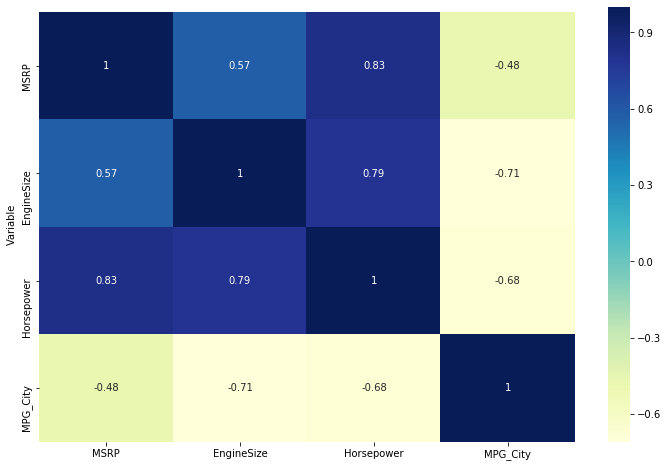

In [201]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(dfCorr, cmap="YlGnBu", annot=True)
ax.set_ylim(len(dfCorr),-.05)  ## Truncation with defaults. Need to adjust limits. Fixed in newer verison of matplotlib.

### b. Histogram

Run the **histogram** action to return a summary of the midpoints and percents. Processing occurs in CAS.

In [202]:
castbl.histogram(inputs=["avgMPG"])

,Variable,BinSetId,BinId,BinLowerBnd,BinUpperBnd,BinWidth,NInBin,Mean,Std,Min,Max,MidPoint,Percent
0,avgMPG,1,1,10.0,15.000000,5.000000,5,12.800000,1.440486,11.0,14.0,12.5,1.168224
1,avgMPG,1,2,15.0,20.000000,5.000000,81,17.493827,1.441557,15.0,19.5,17.5,18.925234
2,avgMPG,1,3,20.0,25.000000,5.000000,212,22.398585,1.345643,20.0,24.5,22.5,49.532710
3,avgMPG,1,4,25.0,30.000000,5.000000,87,26.735632,1.515116,25.0,29.5,27.5,20.327103
4,avgMPG,1,5,30.0,35.000000,5.000000,29,31.258621,1.106964,30.0,34.5,32.5,6.775701
5,avgMPG,1,6,35.0,40.000000,5.000000,9,36.333333,1.581139,35.0,39.0,37.5,2.102804
6,avgMPG,1,7,40.0,45.000000,5.000000,2,41.000000,1.414214,40.0,42.0,42.5,0.467290
7,avgMPG,1,8,45.0,50.000000,5.000000,1,48.500000,NaN,48.5,48.5,47.5,0.233645
8,avgMPG,1,9,50.0,55.000000,5.000000,0,NaN,NaN,NaN,NaN,52.5,0.000000
9,avgMPG,1,10,55.0,60.000000,5.000000,1,55.000000,NaN,55.0,55.0,57.5,0.233645


Store the BinDetails in the variable **mpgHist**.

In [203]:
mpgHist = castbl.histogram(inputs="avgMPG")['BinDetails']

Round the columns Percent and MidPoint.

In [204]:
mpgHist['Percent'] = mpgHist['Percent'].round(1)
mpgHist['MidPoint'] = mpgHist['MidPoint'].round(1)

In [205]:
mpgHist[["MidPoint","Percent"]].head()

,MidPoint,Percent
0,12.5,1.2
1,17.5,18.9
2,22.5,49.5
3,27.5,20.3
4,32.5,6.8


Plot the histogram.

Text(0.5, 1.0, 'Histogram of MPG')

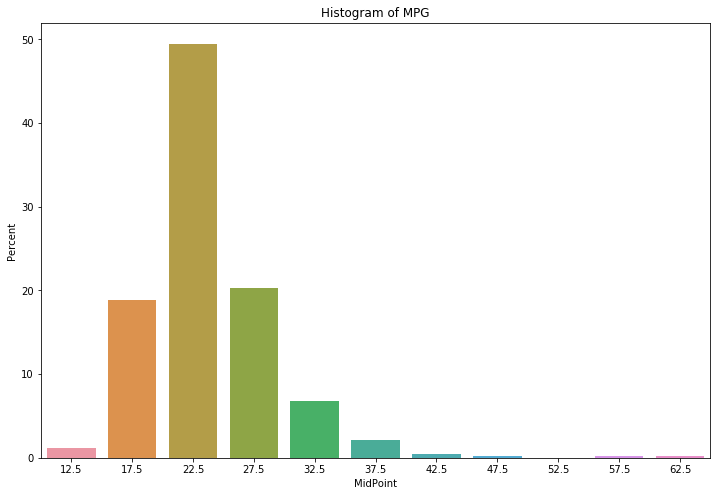

In [206]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x="MidPoint", y="Percent", data=mpgHist)
ax.set_title("Histogram of MPG")

Specify multiple columns in the **histogram** action.

In [207]:
castbl.histogram(inputs=["avgMPG", "HorsePower"])

,Variable,BinSetId,BinId,BinLowerBnd,BinUpperBnd,BinWidth,NInBin,Mean,Std,Min,Max,MidPoint,Percent
0,avgMPG,1,1,10.0,15.000000,5.000000,5,12.800000,1.440486,11.0,14.0,12.500000,1.168224
1,avgMPG,1,2,15.0,20.000000,5.000000,81,17.493827,1.441557,15.0,19.5,17.500000,18.925234
2,avgMPG,1,3,20.0,25.000000,5.000000,212,22.398585,1.345643,20.0,24.5,22.500000,49.532710
3,avgMPG,1,4,25.0,30.000000,5.000000,87,26.735632,1.515116,25.0,29.5,27.500000,20.327103
4,avgMPG,1,5,30.0,35.000000,5.000000,29,31.258621,1.106964,30.0,34.5,32.500000,6.775701
5,avgMPG,1,6,35.0,40.000000,5.000000,9,36.333333,1.581139,35.0,39.0,37.500000,2.102804
6,avgMPG,1,7,40.0,45.000000,5.000000,2,41.000000,1.414214,40.0,42.0,42.500000,0.467290
7,avgMPG,1,8,45.0,50.000000,5.000000,1,48.500000,NaN,48.5,48.5,47.500000,0.233645
8,avgMPG,1,9,50.0,55.000000,5.000000,0,NaN,NaN,NaN,NaN,52.500000,0.000000
9,avgMPG,1,10,55.0,60.000000,5.000000,1,55.000000,NaN,55.0,55.0,57.500000,0.233645


Store the results from the histogram CAS action in the **carsHist** variable.

In [208]:
carsHist = castbl.histogram(inputs=["avgMPG", "HorsePower"])['BinDetails']

Find the unique values in the carsHist SASDataFrame.

In [209]:
list(carsHist.Variable.unique())

['avgMPG', 'Horsepower']

Run a loop through the list of unique values and plot a histogram for each.

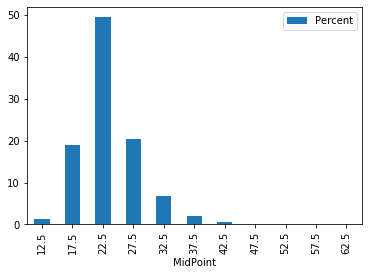

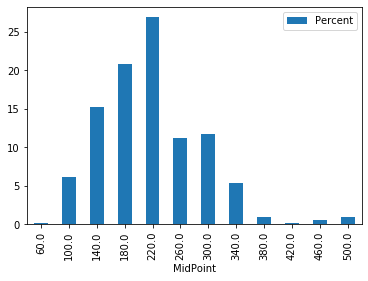

In [210]:
for i in list(carsHist.Variable.unique()):
    carsHist['Percent'] = carsHist['Percent'].round(1)
    carsHist['MidPoint'] = carsHist['MidPoint'].round(1)
    df = carsHist[carsHist["Variable"]==i]
    df.plot.bar(x='MidPoint', y='Percent')

## <a id='12'>12. Promote the Table to use in SAS Visual Analytics

In [211]:
castbl.head()

,Make,Type,Origin,DriveTrain,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,avgMPG
0,Acura,SUV,Asia,All,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,20.0
1,Acura,Sedan,Asia,Front,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,27.5
2,Acura,Sedan,Asia,Front,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,25.5
3,Acura,Sedan,Asia,Front,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,24.0
4,Acura,Sedan,Asia,Front,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,21.0


In [212]:
castbl

CASTable('cars', caslib='casuser', computedvars=['avgMPG'], computedvarsprogram='_add_5_ = (MPG_City) + (MPG_Highway); _div_6_ = (_add_5_) / (2); avgMPG = _div_6_; ')[['Make', 'Type', 'Origin', 'DriveTrain', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'avgMPG']]

### Two Options:
- Save the castbl object as a physical file
- Create a new in-memory table from the castbl object.

### a. Save the castbl Object as a Physical File.

Use the **save** CAS action to save the castbl object as a physical file. Here we will save it as a sashdat file.

In [213]:
castbl.save(name="updatedCars.sashdat", caslib="casuser")

NOTE: Cloud Analytic Services saved the file updatedCars.sashdat in caslib CASUSER(student).


[caslib]

 'CASUSER(student)'

[name]

 'updatedCars.sashdat'

+ Elapsed: 0.00827s, user: 0.00644s, sys: 0.00596s, mem: 17.8mb

View the available files in the casuser caslib. Notice the updatedCars.sashdat file is available.

In [214]:
conn.fileInfo(caslib="casuser")

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,drwxr-xr-x,student,sasusers,VBBF,4096,,2020-03-17T03:16:15-04:00,1.900049e+09
1,-rwxr-xr-x,student,sasusers,cars.sashdat,93280,NONE,2020-09-09T08:09:34-04:00,1.915273e+09
2,-rwxr-xr-x,student,sasusers,updatedCars.sashdat,79768,NONE,2020-09-09T08:09:53-04:00,1.915273e+09


### b. Create a New In-Memory Table From the castbl Object.

The partition CAS action has a variety of options, but if we leave the defaults we can take the castbl object (reference to the cars table with a few columns dropped and the new avgMPG column) and create a new in-memory table without saving a physical file.

Here a new in-memory table will be created called **cars_update** in the casuser caslib from the **castbl** object.

In [215]:
castbl.partition(casout={"caslib":"casuser","name":"cars_update"})

[averageShuffleWaitTime]

 0

[caslib]

 'CASUSER(student)'

[maxShuffleWaitTime]

 0

[minShuffleWaitTime]

 1e+300

[rowsTransferred]

 0

[shuffleWaitTime]

 0

[tableName]

 'CARS_UPDATE'

[casTable]

 CASTable('CARS_UPDATE', caslib='CASUSER(student)')

+ Elapsed: 0.00842s, user: 0.000466s, sys: 0.0198s, mem: 50.7mb

View the new in-memory table **cars_update**.

In [216]:
conn.tableInfo(caslib="casuser")

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS,428,15,0,utf-8,2020-09-09T08:09:35-04:00,2020-09-09T08:09:35-04:00,2020-09-09T08:09:53-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,cars.sashdat,CASUSER(student),0,student,,2020-09-09T08:09:34-04:00,1.915273e+09
1,CASTBLDISTINCT,3,4,0,utf-8,2020-09-09T08:09:43-04:00,2020-09-09T08:09:43-04:00,2020-09-09T08:09:43-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,,,0,student,,,NaN
2,MAKE_AVG,38,2,0,utf-8,2020-09-09T08:09:48-04:00,2020-09-09T08:09:48-04:00,2020-09-09T08:09:48-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,,,0,student,,,NaN
3,CARS_UPDATE,428,14,0,utf-8,2020-09-09T08:09:53-04:00,2020-09-09T08:09:53-04:00,2020-09-09T08:09:53-04:00,UTF8,1.915273e+09,1.915273e+09,1.915273e+09,0,0,0,0,,,0,student,,,NaN


View the files in the casuser caslib. Notice no new files were created.

In [217]:
conn.fileInfo(caslib="casuser")

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,drwxr-xr-x,student,sasusers,VBBF,4096,,2020-03-17T03:16:15-04:00,1.900049e+09
1,-rwxr-xr-x,student,sasusers,cars.sashdat,93280,NONE,2020-09-09T08:09:34-04:00,1.915273e+09
2,-rwxr-xr-x,student,sasusers,updatedCars.sashdat,79768,NONE,2020-09-09T08:09:53-04:00,1.915273e+09


### c. Promote a Table to Global Scope.

View all the tables in the casuser caslib. Focus on the specified columns. Notice no table is global scope.

In [218]:
conn.tableInfo(caslib="casuser")['TableInfo'][['Name','Rows','Columns','Global']]

,Name,Rows,Columns,Global
0,CARS,428,15,0
1,CASTBLDISTINCT,3,4,0
2,MAKE_AVG,38,2,0
3,CARS_UPDATE,428,14,0


Use the **promote** CAS action to promote a table to global scope. Global scope allows other users and software like SAS Visual Analtyics to use the in-memory table. Currently, all the in-memory tables are session scope. That is, only this account on this connection to CAS can see the in-memory tables. 

In this example, the **cars_update** table is promoted to global scope in the casuser caslib. This only allows the current account (student) to access this table since it is promoted in the casuser caslib. If a table is promoted to global scope in a shared caslib, other users can see that table.

***DEMO: Go to SAS Visual Analyics and see cars_update does not exist outside of this session.***

Promote the **cars_update** in-memory table to global scope

In [219]:
conn.promote(name="cars_update", caslib="casuser")

NOTE: Cloud Analytic Services promoted table CARS_UPDATE in caslib CASUSER(student) to table cars_update in caslib CASUSER(student).


+ Elapsed: 0.00117s, user: 0.00102s, mem: 0.314mb

Notice only the **cars_update** table is global.

In [220]:
conn.tableInfo(caslib="casuser")['TableInfo'][['Name','Rows','Columns','Global']]

,Name,Rows,Columns,Global
0,CARS,428,15,0
1,CASTBLDISTINCT,3,4,0
2,MAKE_AVG,38,2,0
3,CARS_UPDATE,428,14,1


***DEMO: Go to SAS Visual Analtyics and view the cars_update table outside of this session now that the in-memory table is global.***